<a href="https://colab.research.google.com/github/itsdakshjain/Data-Hackathon/blob/main/EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# UIDAI Data Hackathon 2026: Demographics & Enrolment Analysis
**Objective:** To identify societal trends and service gaps in Aadhaar enrolment and updates by integrating UIDAI operational data with Census population projections.

## Data Acquisition & Environment Setup
In this initial phase, we load three primary datasets from the official repository:
1. **Biometric Dataset:** Records of mandatory and voluntary fingerprint/iris updates.
2. **Demographic Dataset:** Records of name, address, and gender-related updates.
3. **Enrolment Dataset:** Records of new Aadhaar generation across age groups.


In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set_theme(style="whitegrid")
#plt.rcParams["figure.figsize"] = (11, 6)

df_biometric = pd.read_csv(r'Data\Combined_Datasets\Biometric_Combined.csv')
df_demographic = pd.read_csv(r'Data\Combined_Datasets\Demographic_Combined.csv')
df_enrolment = pd.read_csv(r'Data\Combined_Datasets\Enrolment_Combined.csv')

In [21]:
dataframes = {
    'Biometric': df_biometric,
    'Demographic': df_demographic,
    'Enrolment': df_enrolment
}

# Building a single comparison table
summary_list = []
for name, df in dataframes.items():
    summary_list.append({
        'Dataset': name,
        'Total Rows': f"{df.shape[0]:,}", # This adds the commas for readability
        'Columns': df.shape[1],
        'Missing': df.isnull().sum().sum(),
        'Dupes': df.duplicated().sum()
    })

# Converting to a table for a clean output
summary_table = pd.DataFrame(summary_list)
print(" PROJECT DATA OVERVIEW ")
print(summary_table.to_string(index=False))

 PROJECT DATA OVERVIEW 
    Dataset Total Rows  Columns  Missing  Dupes
  Biometric  1,861,108        6        0  94896
Demographic  2,071,700        6        0 473601
  Enrolment  1,006,029        7        0  22957


In [22]:
print(" Biometric Data ")

df_biometric.info()
df_biometric=df_biometric.drop(columns="pincode")

print("\n Demographic Data ")
df_demographic.info()
df_demographic = df_demographic.drop(columns="pincode")

print("\n Enrolment Data ")
df_enrolment.info()
df_enrolment=df_enrolment.drop(columns="pincode")

 Biometric Data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1861108 entries, 0 to 1861107
Data columns (total 6 columns):
 #   Column        Dtype 
---  ------        ----- 
 0   date          object
 1   state         object
 2   district      object
 3   pincode       int64 
 4   bio_age_5_17  int64 
 5   bio_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 85.2+ MB

 Demographic Data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2071700 entries, 0 to 2071699
Data columns (total 6 columns):
 #   Column         Dtype 
---  ------         ----- 
 0   date           object
 1   state          object
 2   district       object
 3   pincode        int64 
 4   demo_age_5_17  int64 
 5   demo_age_17_   int64 
dtypes: int64(3), object(3)
memory usage: 94.8+ MB

 Enrolment Data 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1006029 entries, 0 to 1006028
Data columns (total 7 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------  

In [23]:
df_biometric

,date,state,district,bio_age_5_17,bio_age_17_
0,01-03-2025,Haryana,Mahendragarh,280,577
1,01-03-2025,Bihar,Madhepura,144,369
2,01-03-2025,Jammu and Kashmir,Punch,643,1091
3,01-03-2025,Bihar,Bhojpur,256,980
4,01-03-2025,Tamil Nadu,Madurai,271,815
...,...,...,...,...,...
1861103,29-12-2025,West Bengal,Uttar Dinajpur,4,9
1861104,29-12-2025,West Bengal,Uttar Dinajpur,0,1
1861105,29-12-2025,West Bengal,West Midnapore,0,3
1861106,29-12-2025,West Bengal,West Midnapore,2,0


In [24]:
from IPython.display import display

print(" Biometric Statistics ")
display(df_biometric.describe())

print("\n Demographic Statistics ")
display(df_demographic.describe())

print("\n Enrolment Statistics ")
display(df_enrolment.describe())

 Biometric Statistics 


,bio_age_5_17,bio_age_17_
count,1.861108e+06,1.861108e+06
mean,1.839058e+01,1.909413e+01
std,8.370421e+01,8.806502e+01
min,0.000000e+00,0.000000e+00
25%,1.000000e+00,1.000000e+00
50%,3.000000e+00,4.000000e+00
75%,1.100000e+01,1.000000e+01
max,8.002000e+03,7.625000e+03



 Demographic Statistics 


,demo_age_5_17,demo_age_17_
count,2.071700e+06,2.071700e+06
mean,2.347552e+00,2.144701e+01
std,1.490355e+01,1.252498e+02
min,0.000000e+00,0.000000e+00
25%,0.000000e+00,2.000000e+00
50%,1.000000e+00,6.000000e+00
75%,2.000000e+00,1.500000e+01
max,2.690000e+03,1.616600e+04



 Enrolment Statistics 


,age_0_5,age_5_17,age_18_greater
count,1.006029e+06,1.006029e+06,1.006029e+06
mean,3.525709e+00,1.710074e+00,1.673441e-01
std,1.753851e+01,1.436963e+01,3.220525e+00
min,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.000000e+00,0.000000e+00,0.000000e+00
50%,2.000000e+00,0.000000e+00,0.000000e+00
75%,3.000000e+00,1.000000e+00,0.000000e+00
max,2.688000e+03,1.812000e+03,8.550000e+02


## Data Cleaning & Formatting
Based on the inspection above, there are two critical issues that need to be resolved before starting analysis:

1. **Date Formatting:** The `date` column is currently stored as text (object). Convert this to a proper datetime format to analyze trends over time.
2. **Deduplication:** Found a significant number of duplicate rows (especially in the Demographic dataset). Removing these to ensure my counts and statistics are accurate and not artificially inflated.

In [27]:
df_biometric['date'] = pd.to_datetime(df_biometric['date'], dayfirst=True) # object to datetime
df_demographic['date'] = pd.to_datetime(df_demographic['date'], dayfirst=True)
df_enrolment['date'] = pd.to_datetime(df_enrolment['date'], dayfirst=True)

df_biometric = df_biometric.drop_duplicates() # drop duplicates
df_demographic = df_demographic.drop_duplicates()
df_enrolment = df_enrolment.drop_duplicates()

print(f"Biometric rows left: {len(df_biometric):,}") # rows left 1.59 million.(from 2.07 million)
print(f"Demographic rows left: {len(df_demographic):,}")
print(f"Enrolment rows left: {len(df_enrolment):,}")

C:\Users\prash\AppData\Local\Temp\ipykernel_12432\742724998.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_biometric['date'] = pd.to_datetime(df_biometric['date'], dayfirst=True) # object to datetime


Biometric rows left: 1,336,285
Demographic rows left: 1,092,869
Enrolment rows left: 509,322


# Visualizing the distributions

### Histogram

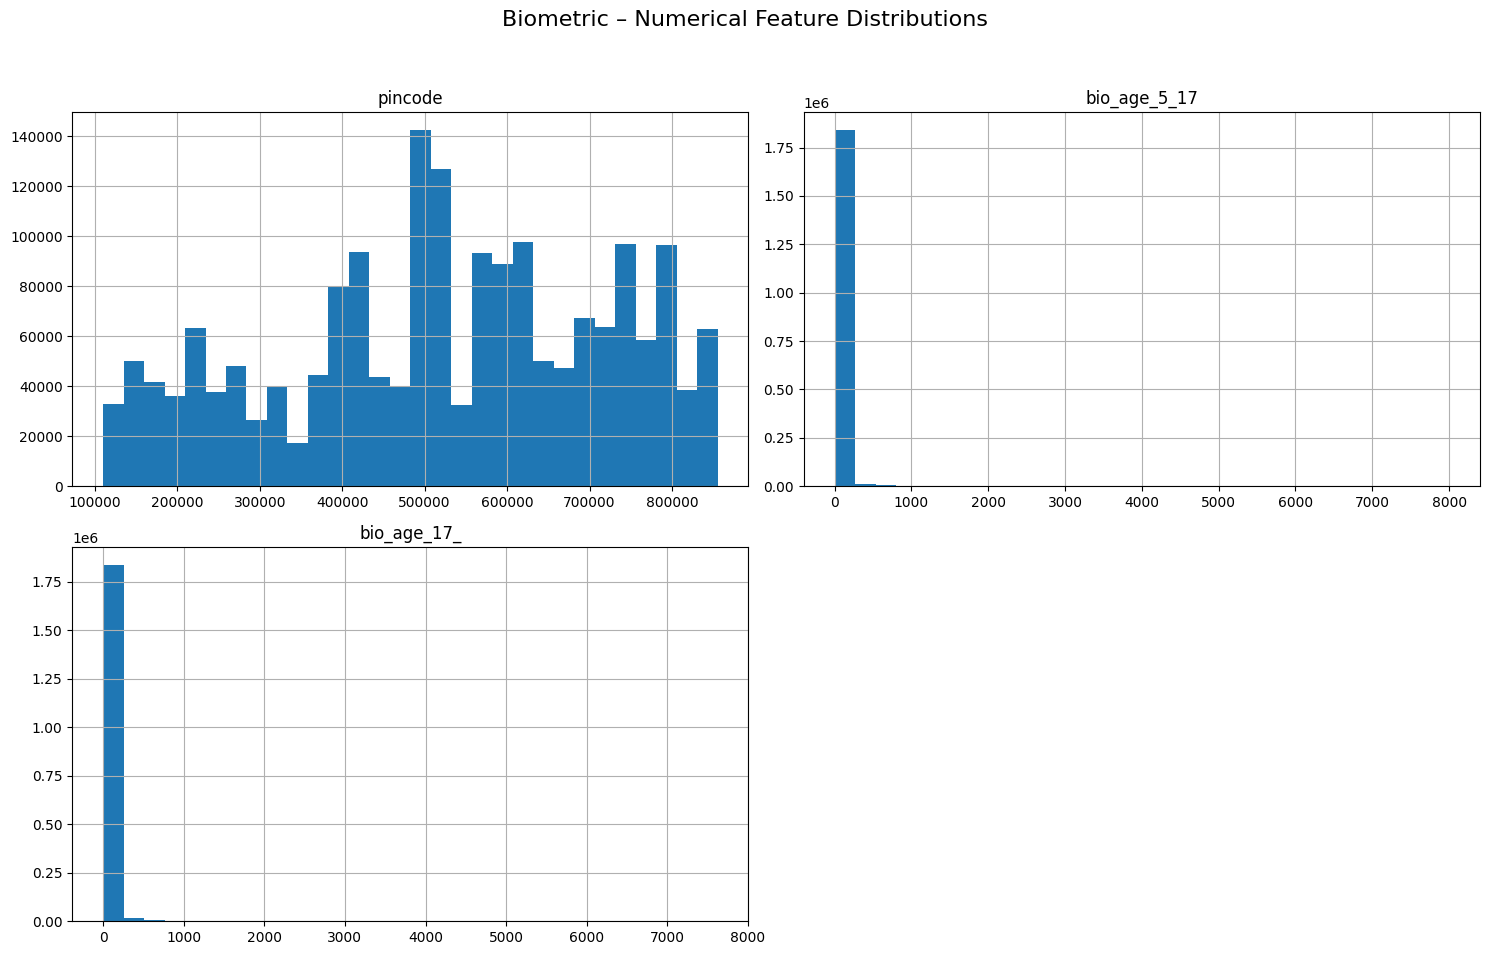

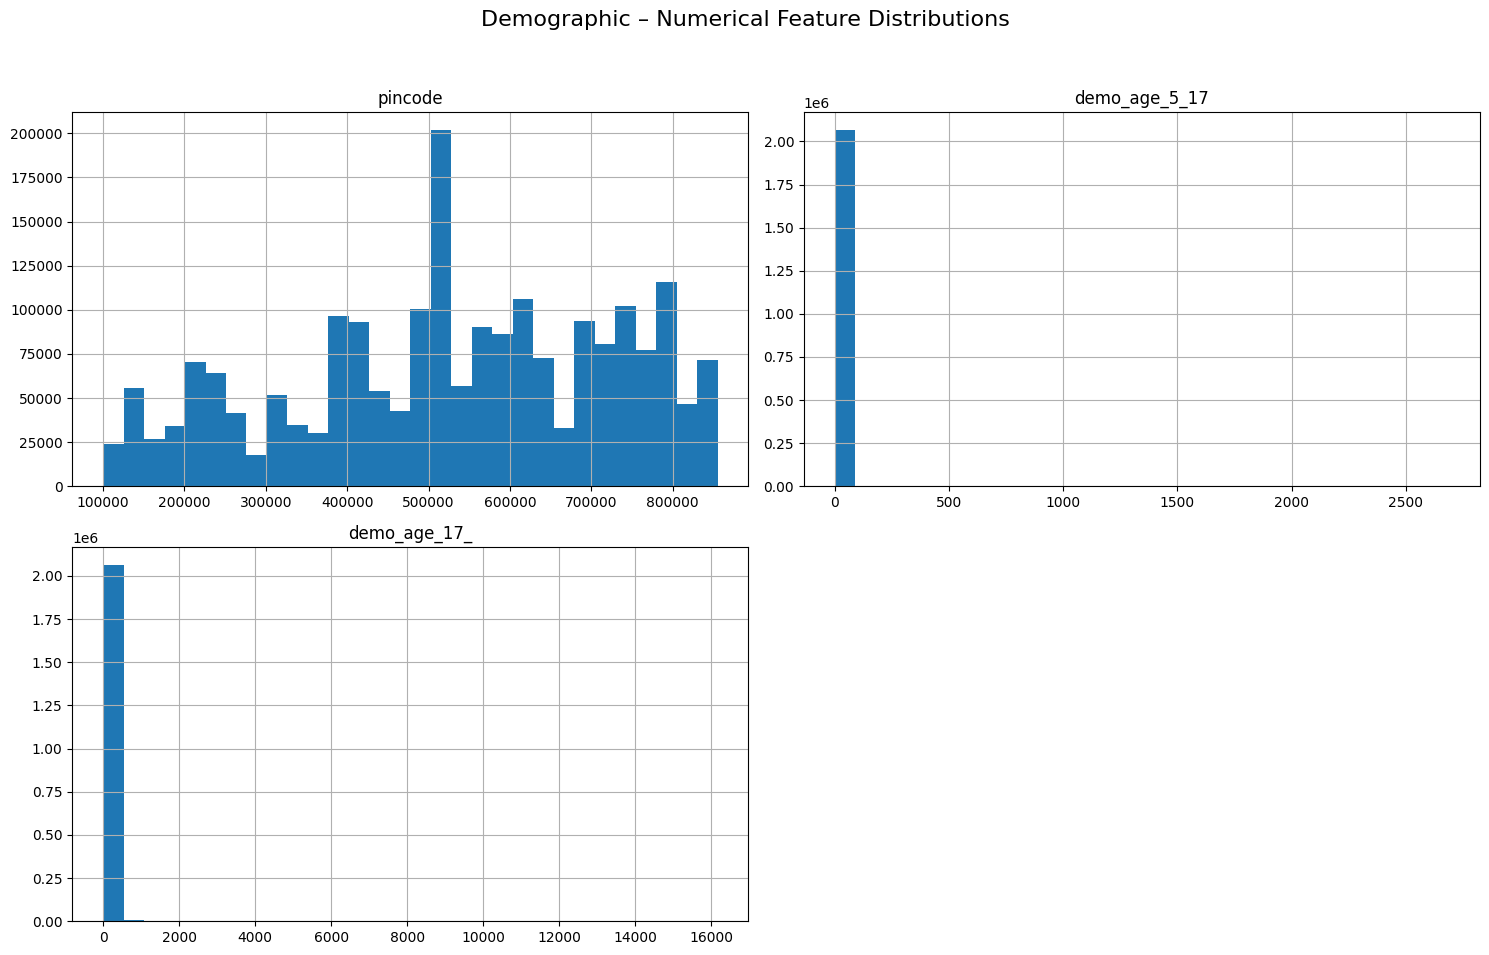

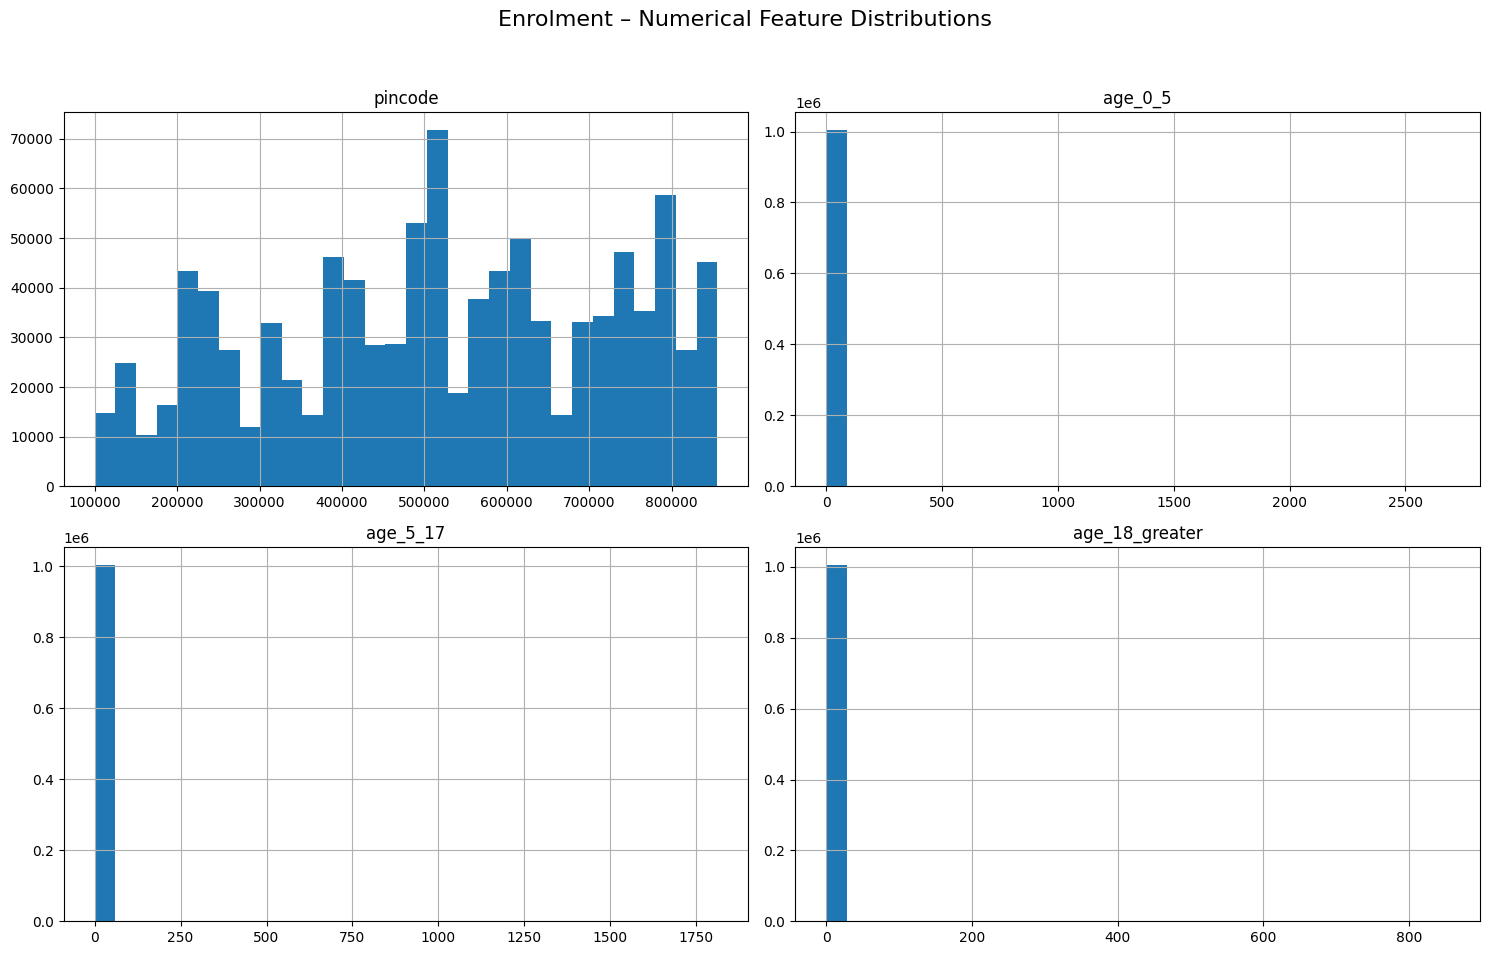

In [ ]:
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=np.number).columns
    
    if len(numeric_cols) == 0:
        continue

    df[numeric_cols].hist(bins=30, figsize=(15, 10))
    plt.suptitle(f"{name} – Numerical Feature Distributions", fontsize=16)
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

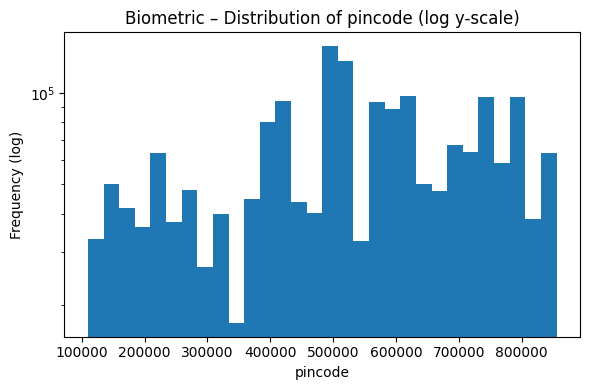

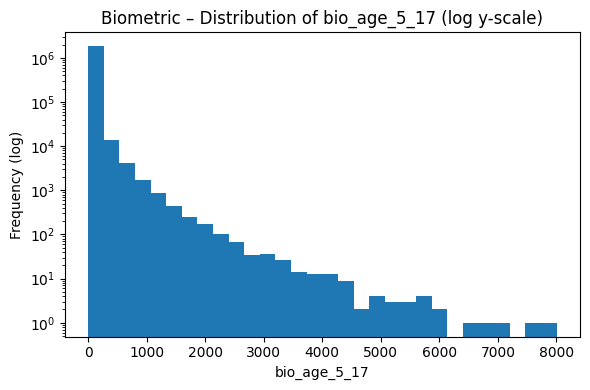

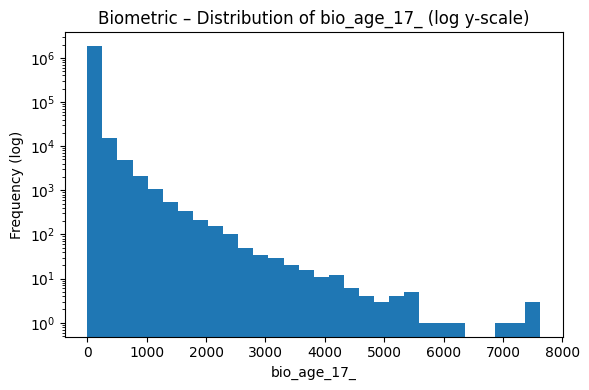

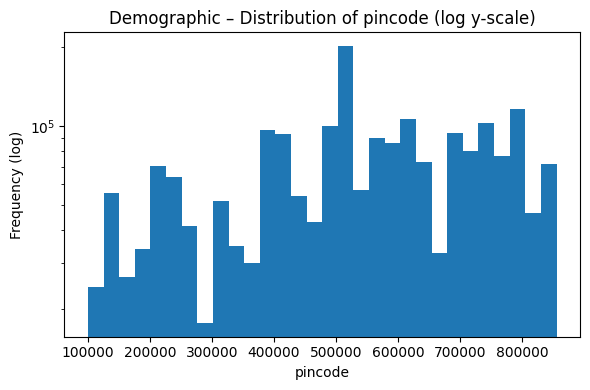

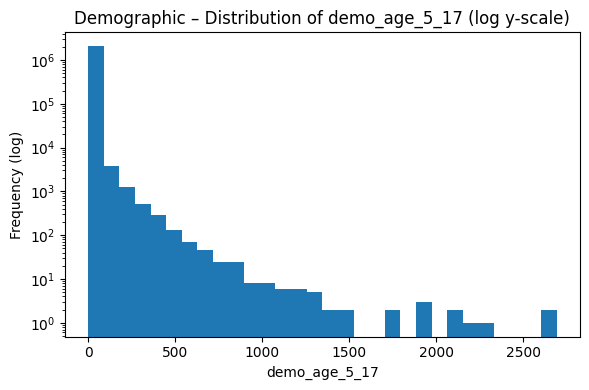

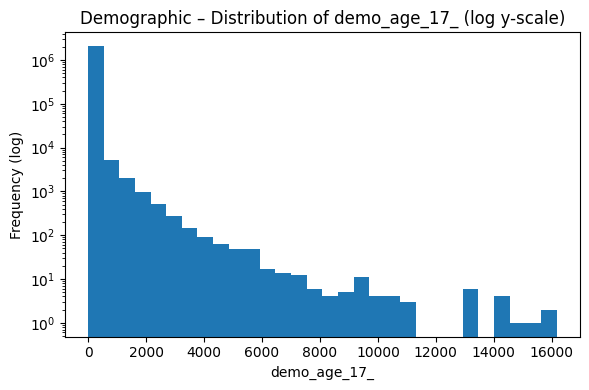

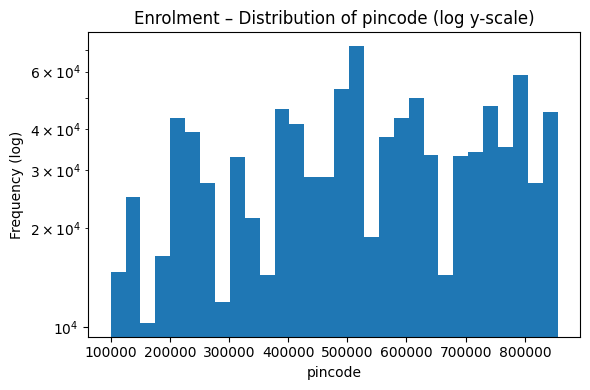

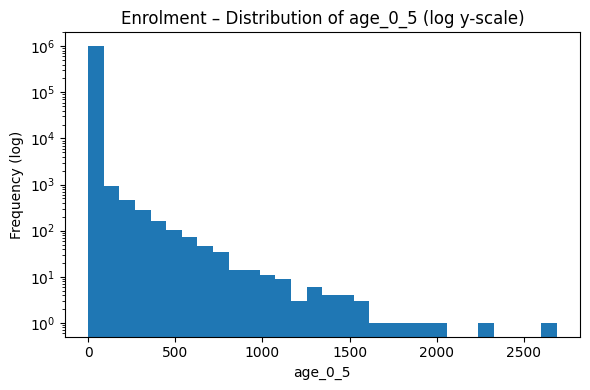

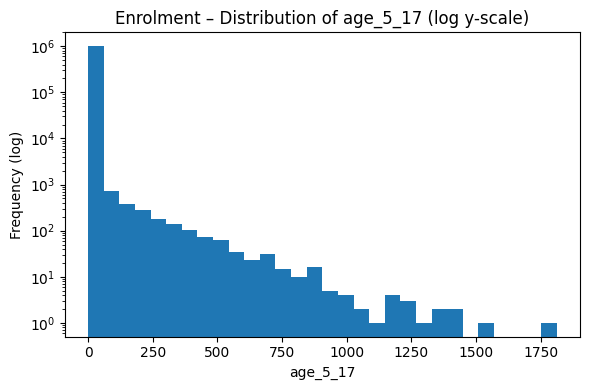

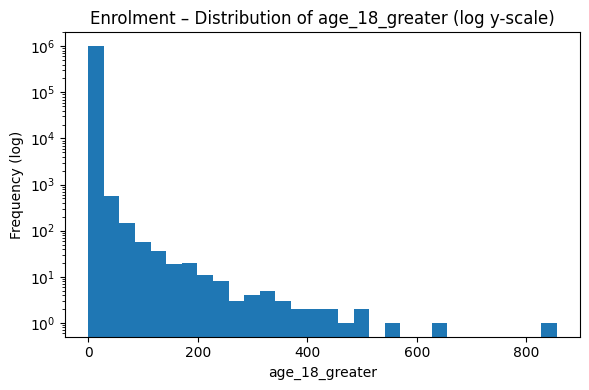

In [30]:
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=np.number).columns

    if len(numeric_cols) == 0:
        continue

    for col in numeric_cols:
        plt.figure(figsize=(6, 4))
        plt.hist(df[col].dropna(), bins=30)
        plt.yscale("log")
        plt.title(f"{name} – Distribution of {col} (log y-scale)", fontsize=12)
        plt.xlabel(col)
        plt.ylabel("Frequency (log)")
        plt.tight_layout()
        plt.show()


### Boxplot

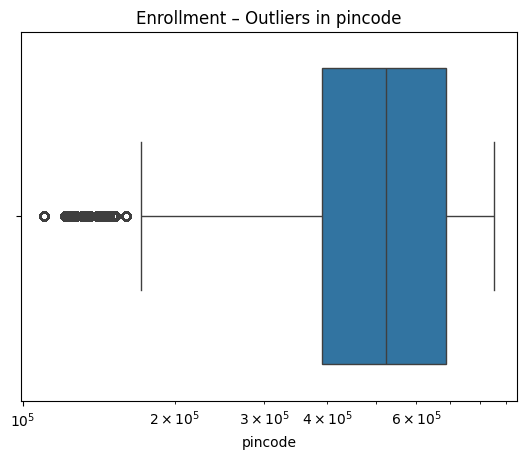

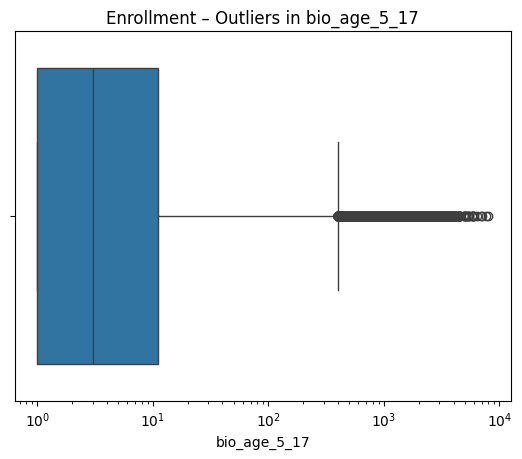

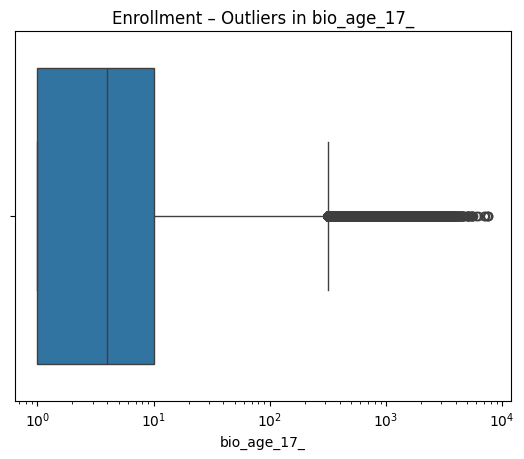

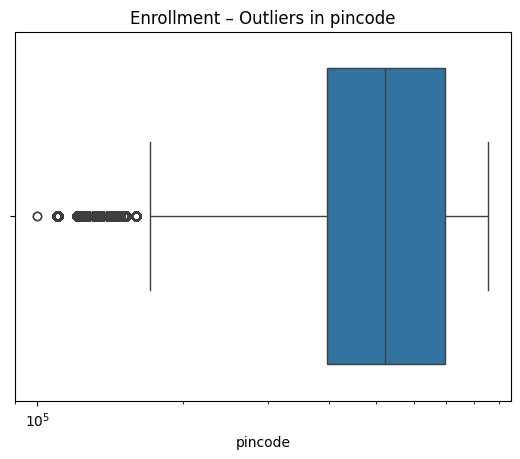

C:\Users\prash\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


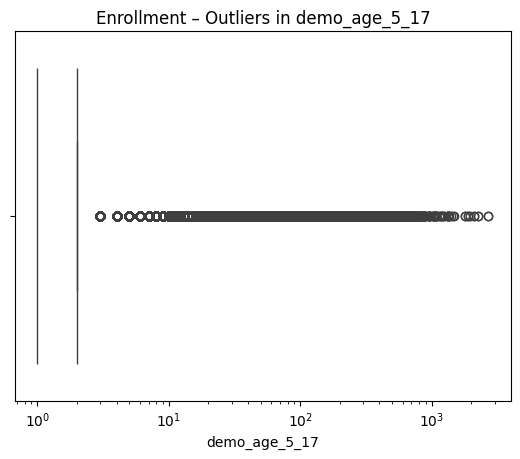

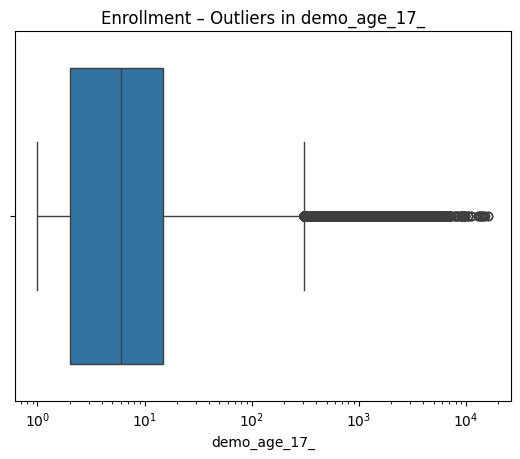

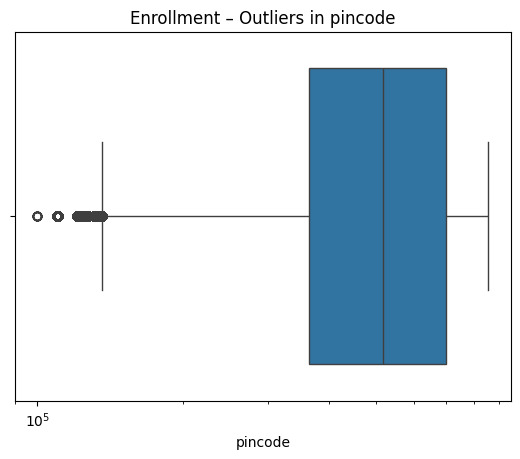

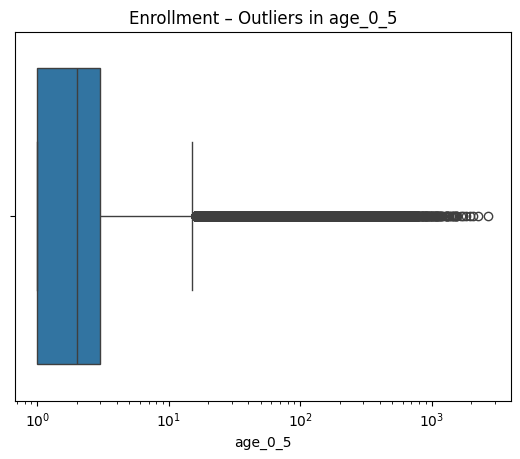

C:\Users\prash\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


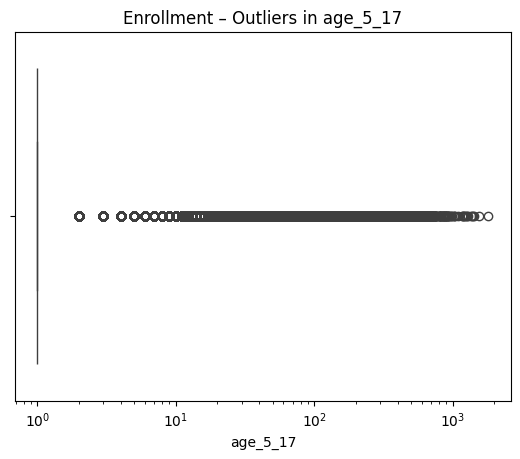

C:\Users\prash\AppData\Roaming\Python\Python313\site-packages\numpy\lib\_function_base_impl.py:4653: RuntimeWarning: invalid value encountered in subtract
  diff_b_a = subtract(b, a)


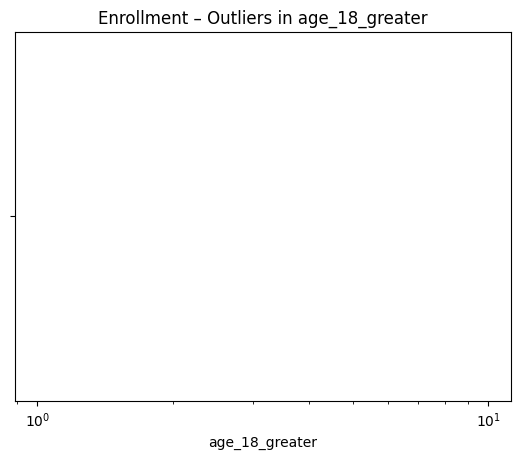

In [33]:
for name, df in dataframes.items():
    numeric_cols = df.select_dtypes(include=np.number).columns

    for col in numeric_cols:
        plt.figure()
        sns.boxplot(x=df[col],log_scale=True)
        plt.title(f"Enrollment – Outliers in {col}")
        plt.show()

## Multivariate Analysis


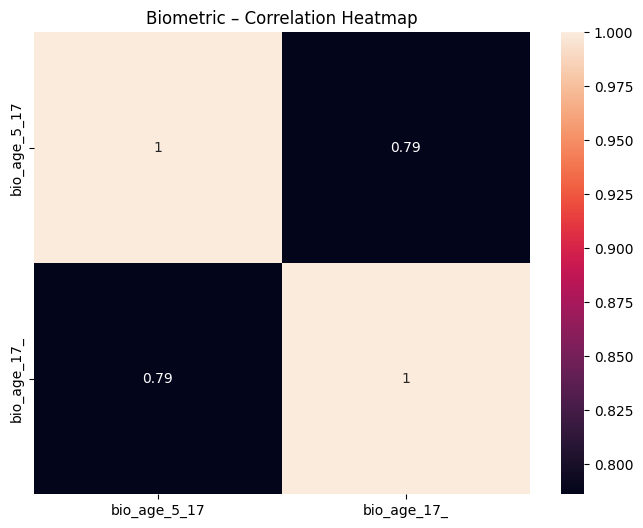

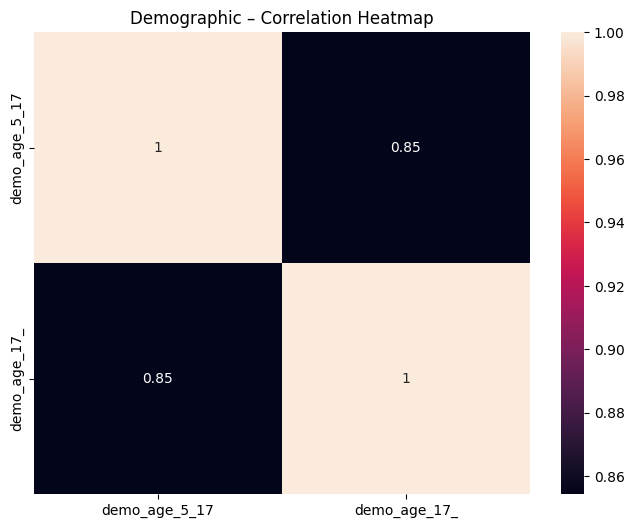

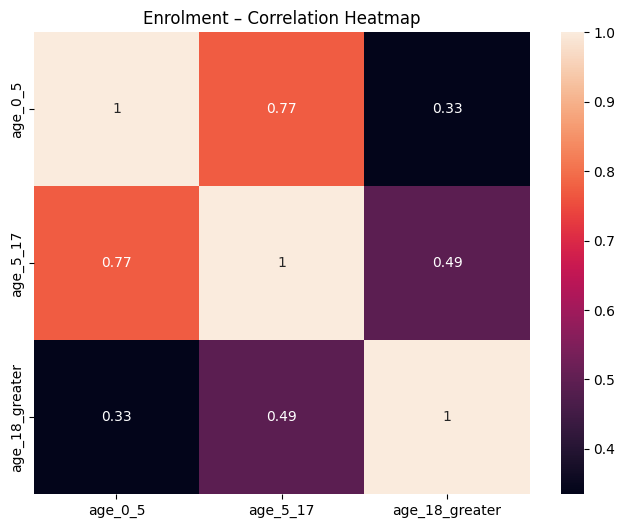

In [31]:
for name, df in dataframes.items():
    numeric_df = df.select_dtypes(include=np.number).drop(columns="pincode")

    if numeric_df.shape[1] < 2:
        continue

    corr = numeric_df.corr()

    plt.figure(figsize=(8, 6))
    sns.heatmap(corr, annot=True)
    plt.title(f"{name} – Correlation Heatmap")
    plt.show()